# House Market

Allons un peu plus loin dans python

1. Téléchargez les trois fichiers “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv”

2. Importez les trois datasets


In [1]:
import pandas as pd
import numpy as np

superficie = pd.read_csv("house market/superficie.csv", header = None)
nombre_de_sdb = pd.read_csv("house market/nombre_de_sdb.csv", header = None)
nombre_de_chambres = pd.read_csv("house market/nombre_de_chambres.csv", header = None)
house_price = pd.read_csv("house market/house_price.csv")

#datasets = {item.stem: pd.read_csv(item.name) for item in datasets}

3. Donnez un nom de colonne à ces trois datasets

In [2]:
superficie.columns = ["id", "superficie"]
nombre_de_sdb.columns = ["id", "nombre_de_sdb"]
nombre_de_chambres.columns = ["id","nombre_de_chambres"]

,id,nombre_de_sdb
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


4. Fusionner ces quatre datasets un seul dataframe (on fera une fusion simplement par index) qu’on nommera dataset

In [4]:
#dataset = pd.merge(superficie, nombre_de_sdb, on='id')
#dataset = pd.merge(dataset, nombre_de_chambres, on='id')
#dataset = pd.merge(dataset, house_price, on='id')

dataset = (superficie
            .merge(nombre_de_chambres, left_on="id", right_on="id")
            .merge(nombre_de_sdb, on="id")
            .merge(house_price , on="id")

 )
    
dataset.head()

,id,superficie,nombre_de_chambres,nombre_de_sdb,Unnamed: 0,house_price
0,0,28844,1,2,32,1421908.0
1,1,27667,4,1,71,1305091.0
2,2,14742,1,1,65,164373.0
3,3,28089,4,3,88,1441714.0
4,4,11713,2,1,49,108290.0


5. Quelle est la superficie moyenne des maisons de notre dataset ?

In [5]:
#20439.77
print(dataset.superficie.mean())

20439.77


6. Quelle est le nombre de chambre médian et moyen ?

,id,superficie,nombre_de_sdb,house_price
nombre_de_chambres,,,,
1,52.260870,22798.695652,1.869565,980774.869565
2,57.387097,19001.483871,2.000000,642086.258065
3,44.555556,19538.037037,2.037037,645904.592593
4,40.315789,21212.315789,1.894737,888045.631579


In [6]:
print(dataset.nombre_de_chambres.mean())
print(dataset.nombre_de_chambres.median())

2.42
2.0


7. Quel est le coût moyen d’une maison ?

In [48]:
#767747.87
print(dataset.house_price.mean())

767747.87


8. Quel est le coût moyen par chambre ?

id                        28.196095
superficie              5387.422486
nombre_de_sdb              0.814881
nombre_de_chambres         0.000000
house_price           664318.109295
dtype: float64

In [7]:
#dataset["prix par chambre"] = dataset["house_price"]/dataset["nombre_de_chambres"]
#print(dataset["prix par chambre"].mean())
dataset.groupby("nombre_de_chambres").mean()

,id,superficie,nombre_de_sdb,Unnamed: 0,house_price
nombre_de_chambres,,,,,
1,52.260870,22798.695652,1.869565,55.000000,980774.869565
2,57.387097,19001.483871,2.000000,50.387097,642086.258065
3,44.555556,19538.037037,2.037037,51.370370,645904.592593
4,40.315789,21212.315789,1.894737,38.736842,888045.631579


In [8]:
premier_decile = dataset.house_price > dataset.house_price.quantile(.1)
dernier_decile = dataset.house_price < dataset.house_price.quantile(.9)

dataset[(premier_decile) & (dernier_decile)].groupby("nombre_de_chambres").mean()

,id,superficie,nombre_de_sdb,Unnamed: 0,house_price
nombre_de_chambres,,,,,
1,53.882353,22955.117647,1.823529,63.176471,847546.117647
2,59.851852,19423.740741,1.925926,51.000000,656395.000000
3,41.550000,20623.650000,2.050000,49.050000,644955.400000
4,38.375000,20039.875000,2.000000,40.375000,700004.437500


,id,superficie,nombre_de_sdb,house_price
nombre_de_chambres,,,,
1,53.882353,22955.117647,1.823529,847546.117647
2,59.851852,19423.740741,1.925926,656395.000000
3,41.550000,20623.650000,2.050000,644955.400000
4,38.375000,20039.875000,2.000000,700004.437500


10. Le coût moyen par chambre ne nous apprend pas grand chose.Tentons de faire des catégories de superficie

  - Créez une nouvelle colonne dans votre dataset qu’on appellera taille_maison
Créez trois catégories qui respectivement correspondront à :

      - “très grande” == “une maison dont la taille est supérieure à 25 000 sqrt_feet”
      
      - “grande” == “une maison dont la taille est comprise entre 20 000 et 25 000 sqrt_feet”
      
      - “moyenne” == “une maison dont la taille est comprise entre 15 000 et 20 000 sqrt_feet”
    
      - "petite" == "une maison dont la taille est comprise entre 10 000 et 15 000 sqrt_feet” 
    
      - "très petite" == une maison dont la taille est inférieure à 10 000 sqrt_feet”
      
Remplissez les lignes correspondantes dans la colonne taille_maison

In [10]:
dataset["categorie_superficie"] = dataset.superficie
dataset["categorie_superficie"] = dataset["categorie_superficie"].apply(lambda x: "Très Grande" if x>25000 
                                                                        else "Grande" if x>20000 
                                                                        else "Moyenne" if x>15000 
                                                                        else "Petite" if x>10000 
                                                                        else "Très Petite")
dataset.head()


,id,superficie,nombre_de_chambres,nombre_de_sdb,Unnamed: 0,house_price,categorie_superficie
0,0,28844,1,2,32,1421908.0,Très Grande
1,1,27667,4,1,71,1305091.0,Très Grande
2,2,14742,1,1,65,164373.0,Petite
3,3,28089,4,3,88,1441714.0,Très Grande
4,4,11713,2,1,49,108290.0,Petite


In [13]:
bins = [0, 10000, 15000, 20000, 25000,1000000]
labels = ["Très Petite","Petite","Moyenne","Grande","Très Grande"]
dataset['categorie_superficie2'] = pd.cut(dataset['superficie'], bins=bins, labels=labels)
dataset.head()

,id,superficie,nombre_de_chambres,nombre_de_sdb,Unnamed: 0,house_price,categorie_superficie,categorie_superficie2
0,0,28844,1,2,32,1421908.0,Très Grande,Très Grande
1,1,27667,4,1,71,1305091.0,Très Grande,Très Grande
2,2,14742,1,1,65,164373.0,Petite,Petite
3,3,28089,4,3,88,1441714.0,Très Grande,Très Grande
4,4,11713,2,1,49,108290.0,Petite,Petite


11. Quel est le coût moyen d’une maison en fonction de sa catégorie de superficie ?


In [14]:
dataset.boxplot(column=["house_price"], by="categorie_superficie2")

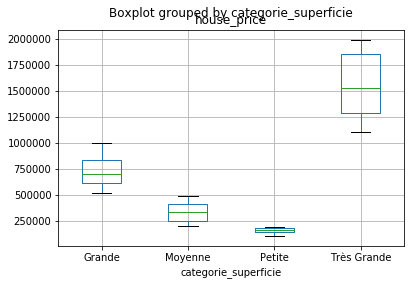

In [15]:
dataset.boxplot(column=["house_price"], by="categorie_superficie")

In [16]:
#Utilisation des masques
dataset[dataset["categorie_superficie"] == "Très Grande"].mean()

id                    4.212500e+01
superficie            2.753081e+04
nombre_de_chambres    2.343750e+00
nombre_de_sdb         2.062500e+00
Unnamed: 0            4.396875e+01
house_price           1.552456e+06
dtype: float64

 12. Appliquez le code ci-dessous pour visualiser votre résultat. Que pouvez vous conclure ?

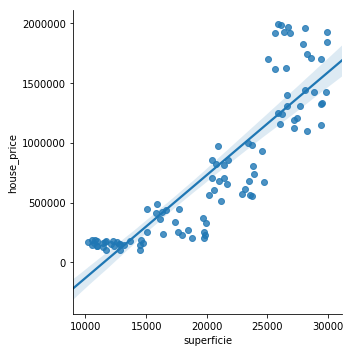

In [18]:
import seaborn as sns
sns.lmplot(x = "superficie", y="house_price", data = dataset)

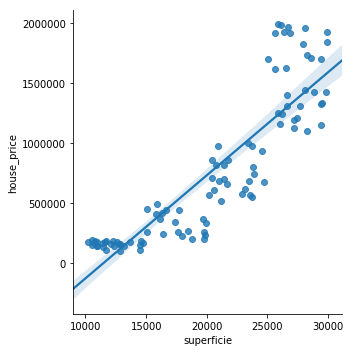

In [68]:
import seaborn as sns
sns.lmplot(x = "superficie", y="house_price", data = dataset)

On peut voir sur le graphique que plus la superficie d’une maison monte, plus son prix monte. Il y a donc une corrélation linéaire assez forte entre ces deux variables. 